# NBA Trends Project
*Analysis of National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

This project aims to analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform analysis. 


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### 1. Comparison of points
The data has been subset into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014).

We want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, we create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [5]:
knicks_pts = nba_2010.pts[nba_2010.fran_id == 'Knicks']
nets_pts = nba_2010.pts[nba_2010.fran_id == 'Nets']

### 2. Difference of average points

In [6]:
diff_means_2010 = knicks_pts.mean() - nets_pts.mean()
print("The average point scored by Knicks in 2010 was {}, while the average for Nets was {}."
      "\nThe difference between two teams' average points is {}".format(round(knicks_pts.mean()), round(nets_pts.mean()), round(diff_means_2010)))

The average point scored by Knicks in 2010 was 102, while the average for Nets was 92.
The difference between two teams' average points is 10


### 3. Visualizing results
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets.


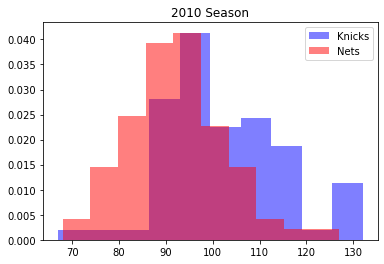

<Figure size 432x288 with 0 Axes>

In [7]:
plt.hist(knicks_pts, color='blue', label= 'Knicks', density = True, alpha=0.5)
plt.hist(nets_pts, color='red', label= 'Nets', density = True, alpha=0.5)
plt.legend()
plt.title('2010 Season')
plt.show()
plt.clf()

### 4. Comparison of games in 2010 and 2014
Replicate the previous steps to explore 2014 data.


In [8]:
knicks_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Knicks']
nets_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Nets']

In [9]:
diff_means_2014 = knicks_pts_14.mean() - nets_pts_14.mean()
print("The average point scored by Knicks in 2014 was {}, while the average for Nets was {}."
      "\nThe difference between two teams' average points is {}".format(round(knicks_pts_14.mean()), round(nets_pts_14.mean()), round(diff_means_2014, 2)))

The average point scored by Knicks in 2014 was 99, while the average for Nets was 98.
The difference between two teams' average points is 0.45


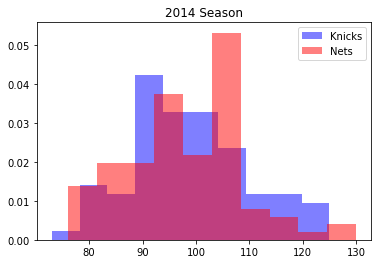

<Figure size 432x288 with 0 Axes>

In [10]:
plt.hist(knicks_pts_14, color='blue', label='Knicks', density=True, alpha=0.5)
plt.hist(nets_pts_14, color='red', label='Nets', density=True, alpha=0.5)
plt.legend()
plt.title('2014 Season')
plt.show()
plt.clf()

### 5. Detailed analysis of 2010 data
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

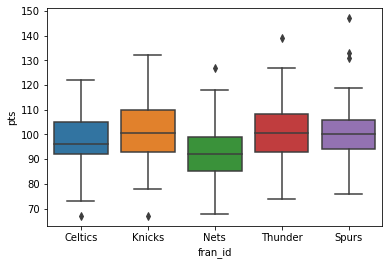

<Figure size 432x288 with 0 Axes>

In [11]:
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()
plt.clf()

### 6. Win & Loss trend at home
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

We calculate a table of frequencies that shows the counts of game_result and game_location and save the resul as `location_result_freq`.

In [12]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


### 7. Converting the table into proportions

Convert this table of frequencies to a table of proportions and save as `location_result_proportions`.

In [13]:
location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


### 8. Chi-Square statistics
Using the contingency table created above, we calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

In [14]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected) ; print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. The result indicates there is an association.*

### 9. How reliable is predictions?

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, we calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset.

In [15]:
nba_2010_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(nba_2010_cov)

[[5.22668307e-02 1.37461257e+00]
 [1.37461257e+00 1.86559287e+02]]


### 10. Strength of the correlation

Because 538’s forecast variable is reported as a probability, we can calculate the strength of the correlation.

Using nba_2010, we calculate the correlation between `forecast` and `point_diff` and save it as `point_diff_forecast_corr`.

In [16]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

(0.4402088708468084, 9.410391573137756e-23)


*The result demonstrates that there is strong correlation between prediction and actual results.*

### 11. Visualizing the relationship between prediction and point difference

We generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis).

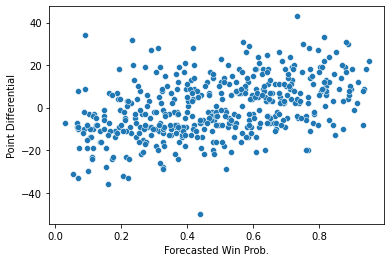

In [17]:
sns.scatterplot(data=nba_2010, x='forecast', y='point_diff')
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()